<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 实现单层回归神经网络

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32) # 需要保证两个矩阵计算的数据类型要一致
z = torch.tensor([-0.2,-0.05,-0.05,0.1])
X.shape,z

(torch.Size([4, 3]), tensor([-0.2000, -0.0500, -0.0500,  0.1000]))

In [ ]:
w = torch.tensor([-0.2,0.15,0.15])

In [ ]:
def LinearR(X,w):
  zhat = torch.mv(X,w)
  return zhat

In [ ]:
zhat = LinearR(X,w)
zhat

tensor([-0.2000, -0.0500, -0.0500,  0.1000])

torch.tensor - 判断输入数据的类型，根据输入类型决定数据类型

torch.Tensor - 将输入数据完全变为float32

In [ ]:
zhat == z

tensor([ True, False, False, False])

发现z与zhat不是完全相等

In [ ]:
SSE = sum((zhat-z)**2)
SSE

tensor(8.3267e-17)

In [ ]:
torch.set_printoptions(precision=30)

In [ ]:
zhat

tensor([-0.200000002980232238769531250000, -0.049999997019767761230468750000,
        -0.049999997019767761230468750000,  0.100000008940696716308593750000])

In [ ]:
z

tensor([-0.200000002980232238769531250000, -0.050000000745058059692382812500,
        -0.050000000745058059692382812500,  0.100000001490116119384765625000])

发现zhat与z有精度差异

1. float32只保留32位，所以精确性会有问题
2. torch.mv在计算的时候，内部计算会出现微小的精度问题

In [ ]:
preds = torch.ones(300,68,64,64) * 0.1
preds.sum()*10
# 精度是float32

tensor(83558328.)

In [ ]:
preds = torch.ones(300,68,64,64)
preds.sum()

tensor(83558400.)

In [ ]:
preds = preds = torch.ones(300,68,64,64,dtype = torch.float64)
preds.sum()
# 精度是float64（但64位很占内存）

tensor(83558400., dtype=torch.float64)

In [ ]:
torch.allclose(z,zhat) # 可以无视很小的区别

True

# torch.nn.Linear实现单层回归神经网络的正向传播

In [ ]:
import torch

In [ ]:
X = torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
# 只需要输入特征矩阵即可，不用加上bias那一列

In [ ]:
# 实例化nn.Linear
output = torch.nn.Linear(2,1)
# 若不想生成bias则 output = torch.nn.Linear(2,1,bias=False)

传输的两个参数分别是：
1. 上一层的神经元个数（上一层神经元给下一层神经元传输数据的神经元的个数）
2. 下一层的神经元的个数

神经元的个数由特征个数决定

In [ ]:
zhat = output(X)
zhat

tensor([[-0.4686],
        [ 0.0716],
        [-1.0232],
        [-0.4830]], grad_fn=<AddmmBackward0>)

In [ ]:
output.weight

Parameter containing:
tensor([[ 0.5402, -0.5547]], requires_grad=True)

In [ ]:
output.bias

Parameter containing:
tensor([-0.4686], requires_grad=True)

通过设置随机数种子来实现随机化

In [ ]:
torch.random.manual_seed(420) # 认为设置随机数种子
output = torch.nn.Linear(2,1)
zhat = output(X)
zhat,zhat.shape

(tensor([[0.6730],
         [1.1048],
         [0.2473],
         [0.6792]], grad_fn=<AddmmBackward0>), torch.Size([4, 1]))

In [ ]:
output.weight

Parameter containing:
tensor([[ 0.4318, -0.4256]], requires_grad=True)

In [ ]:
output.bias

Parameter containing:
tensor([0.6730], requires_grad=True)

# 二分类神经网络：逻辑回归

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)

Text(0.5, 1.0, 'Sigmoid')

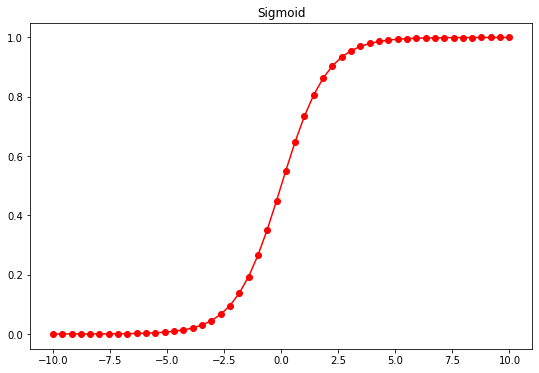

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
y = sigmoid(x)
plt.figure(figsize=(9,6))
plt.plot(x,y,"ro-",)
plt.title("Sigmoid")

tensor 实现与门

In [ ]:
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32)

In [ ]:
andgate = torch.tensor([0,0,0,1],dtype=torch.float32).reshape(-1,1)

In [ ]:
w = torch.tensor([-0.2,0.15,0.15],dtype=torch.float32)

In [ ]:
def LogistcR(X,w):
  zhat = torch.mv(X,w)
  sigma = torch.sigmoid(zhat)
  andhat = torch.tensor([int(x) for x in sigma >= 0.5],dtype=torch.float32)
  return sigma, andhat
sigma, andhat = LogistcR(X,w)
sigma, andhat 

(tensor([0.4502, 0.4875, 0.4875, 0.5250]), tensor([0., 0., 0., 1.]))

In [ ]:
andhat.reshape(-1,1) == andgate

tensor([[True],
        [True],
        [True],
        [True]])

tanh函数

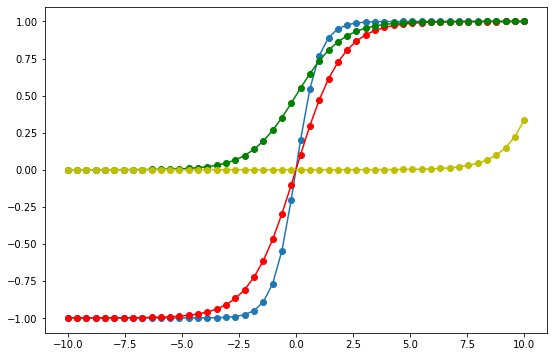

In [23]:
x = np.linspace(-10,10)
x = torch.tensor(x)
def tanh(x):
  return (torch.exp(2*x)-1)/(torch.exp(2*x)+1)
def tanh1(x):
  return (torch.exp(x)-1)/(torch.exp(x)+1)
y = tanh(x)
y1 = tanh1(x)
y2 = torch.sigmoid(x)
y3 = torch.softmax(x,0)
plt.figure(figsize=(9,6))
plt.plot(x,y,"o-")
plt.plot(x,y1,"ro-")
plt.plot(x,y2,"go-")
plt.plot(x,y3,"yo-")

torch.function实现单层二分类神经网络的正向传播

In [ ]:
import torch
from torch.nn import functional as F

In [6]:
X = torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
torch.random.manual_seed(420)
dense = torch.nn.Linear(2,1)
zhat = dense(X)
sigma = F.sigmoid(zhat)
y = [int(x) for x in sigma >= 0.5]
zhat,y

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(tensor([[0.6730],
         [1.1048],
         [0.2473],
         [0.6792]], grad_fn=<AddmmBackward0>), [1, 1, 1, 1])

In [9]:
F.relu(zhat)

tensor([[0.6730],
        [1.1048],
        [0.2473],
        [0.6792]], grad_fn=<ReluBackward0>)

In [17]:
torch.tanh(zhat)

tensor([[0.5869],
        [0.8022],
        [0.2424],
        [0.5910]], grad_fn=<TanhBackward0>)

In [18]:
torch.sign(zhat)

tensor([[1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SignBackward0>)

# 多分类问题：Softmax回归

In [20]:
z = torch.tensor([1010,1000,990],dtype=torch.float32)
torch.softmax(z,0)
# pytorch中softmax不会发生溢出现象  

tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])

Softmax第一个参数输入的是用来计算的参数
第二个参数是计算的维度的索引

In [30]:
s = torch.tensor([[[1,2,4,5],[3,4,4,5],[5,6,4,5]],[[5,6,4,5],[7,8,4,5],[9,10,4,5]]],dtype=torch.float32)
s.ndim,s.shape

(3, torch.Size([2, 3, 4]))

In [32]:
s.shape[0] # = s.shape[-3]

2

In [33]:
s.shape[1] # = s.shape[-2]

3

In [34]:
s.shape[2] # = s.shape[-1]

4

In [36]:
torch.softmax(s,0) # 每一个二维张量就是一类

tensor([[[0.0180, 0.0180, 0.5000, 0.5000],
         [0.0180, 0.0180, 0.5000, 0.5000],
         [0.0180, 0.0180, 0.5000, 0.5000]],

        [[0.9820, 0.9820, 0.5000, 0.5000],
         [0.9820, 0.9820, 0.5000, 0.5000],
         [0.9820, 0.9820, 0.5000, 0.5000]]])

In [37]:
torch.softmax(s,1) # 每一行就是一类

tensor([[[0.0159, 0.0159, 0.3333, 0.3333],
         [0.1173, 0.1173, 0.3333, 0.3333],
         [0.8668, 0.8668, 0.3333, 0.3333]],

        [[0.0159, 0.0159, 0.3333, 0.3333],
         [0.1173, 0.1173, 0.3333, 0.3333],
         [0.8668, 0.8668, 0.3333, 0.3333]]])

In [38]:
torch.softmax(s,2) # 每一列就是一类

tensor([[[0.0128, 0.0347, 0.2562, 0.6964],
         [0.0723, 0.1966, 0.1966, 0.5344],
         [0.1966, 0.5344, 0.0723, 0.1966]],

        [[0.1966, 0.5344, 0.0723, 0.1966],
         [0.2562, 0.6964, 0.0128, 0.0347],
         [0.2671, 0.7262, 0.0018, 0.0049]]])

使用nn.Linear与function实现多分类神经网络的正向传播

In [43]:
X = torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
torch.random.manual_seed(420)
output = torch.nn.Linear(2,3)
zhat = output(X)
torch.softmax(zhat,1)

tensor([[0.4623, 0.3494, 0.1883],
        [0.4598, 0.4422, 0.0980],
        [0.4896, 0.3229, 0.1875],
        [0.4902, 0.4115, 0.0983]], grad_fn=<SoftmaxBackward0>)